In [ ]:
!pip install opencv-python numpy matplotlib


Número de formas detectadas: 208
Área promedio: 68.53
Perímetro promedio: 18.82


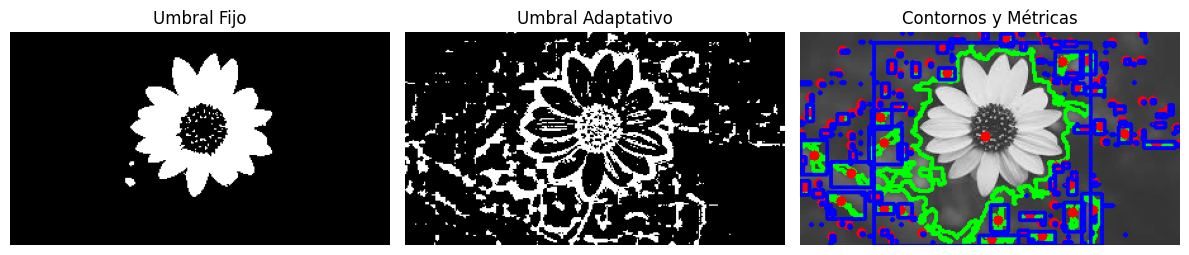

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(img):
    # 1. Convertir a escala de grises si no lo está
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img

    # 2. Segmentación binaria - Umbral fijo
    _, thresh_fixed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # 3. Segmentación binaria - Umbral adaptativo
    thresh_adapt = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY_INV, 11, 3
    )

    # 4. Detectar contornos
    contours, _ = cv2.findContours(thresh_adapt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 5. Dibujar contornos sobre la imagen original
    img_contours = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

    areas = []
    perimeters = []

    for cnt in contours:
        # 6. Centro de masa
        M = cv2.moments(cnt)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.circle(img_contours, (cx, cy), 4, (0, 0, 255), -1)

        # 7. Bounding box
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img_contours, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # 8. Métricas
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt, True)
        areas.append(area)
        perimeters.append(perimeter)

    # Mostrar métricas
    print("Número de formas detectadas:", len(contours))
    if areas:
        print("Área promedio: {:.2f}".format(np.mean(areas)))
        print("Perímetro promedio: {:.2f}".format(np.mean(perimeters)))

    # Visualizar resultados
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Umbral Fijo")
    plt.imshow(thresh_fixed, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Umbral Adaptativo")
    plt.imshow(thresh_adapt, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Contornos y Métricas")
    plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Cargar imagen local
# img = cv2.imread('ruta_a_tu_imagen.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('/content/flour.jpeg')  # O imagen en color
process_image(img)


Número de formas detectadas: 3579
Área promedio: 19.56
Perímetro promedio: 14.40


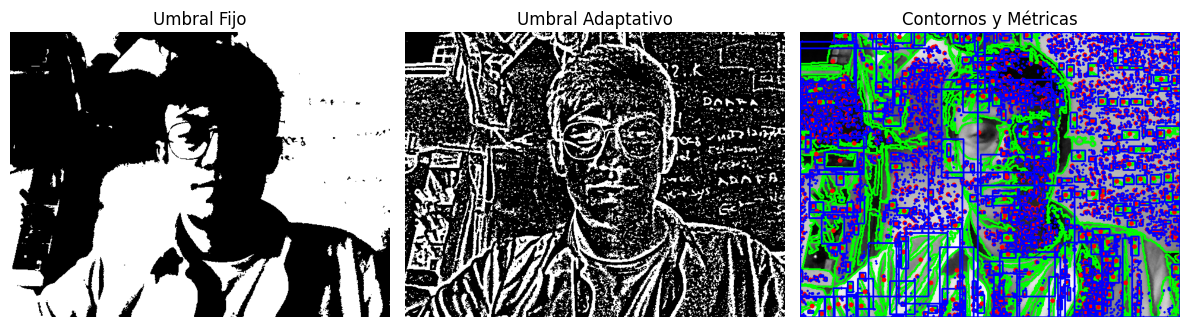

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2

def capture_webcam():
    js = """
    async function takePhoto() {
      const div = document.createElement('div');
      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      await new Promise(resolve => setTimeout(resolve, 2000));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getTracks().forEach(track => track.stop());
      div.remove();

      return canvas.toDataURL('image/jpeg');
    }
    takePhoto();
    """
    data_url = eval_js(js)
    header, encoded = data_url.split(",", 1)
    img_bytes = b64decode(encoded)
    img_array = np.frombuffer(img_bytes, dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    return img

# Capturar y procesar imagen desde webcam
img = capture_webcam()
process_image(img)


https://chatgpt.com/share/6811db0a-07cc-8004-8f2a-1f5052deb172